In [75]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import helpers
import pandas as pd
from skimage import exposure
from PIL import Image
from scipy import ndimage
from skimage.measure import label, regionprops_table, regionprops
from skimage import util
from skimage import filters

In [57]:
# filename = 'benoitdata/F20-14A/HA-900_6um_jamtveit_att_pag-2.29_3.40_02043.tif'
filename = 'benoitdata/F20-14A/HA-900_6um_jamtveit_att_pag-2.29_3.40_04995.tif'

img = cv2.imread(filename,0)

In [73]:
import cv2
import numpy as np
from skimage.morphology import rectangle
import skimage.filters as filters

# compute square of image
img_sq = cv2.multiply(img, img)

# compute local mean in 5x5 rectangular region of each image
# note: python will give warning about slower performance when processing 16-bit images
region = rectangle(5,5)
mean_img = filters.rank.mean(img, selem=region)
mean_img_sq = filters.rank.mean(img_sq, selem=region)

# compute square of local mean of img
sq_mean_img = cv2.multiply(mean_img, mean_img)

# compute variance using float versions of images
var = cv2.add(mean_img_sq.astype(np.float32), -sq_mean_img.astype(np.float32))


In [92]:
def crimmins(data):
    new_image = data.copy()
    nrow = len(data)
    ncol = len(data[0])
    
    # Dark pixel adjustment
    
    # First Step
    # N-S
    for i in range(1, nrow):
        for j in range(ncol):
            if data[i-1,j] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(ncol-1):
            if data[i,j+1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow):
        for j in range(1, ncol):
            if data[i-1,j-1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    #NE-SW
    for i in range(1, nrow):
        for j in range(ncol-1):
            if data[i-1,j+1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # Second Step
    # N-S
    for i in range(1, nrow-1):
        for j in range(ncol):
            if (data[i-1,j] > data[i,j]) and (data[i,j] <= data[i+1,j]):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j+1] > data[i,j]) and (data[i,j] <= data[i,j-1]):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i-1,j-1] > data[i,j]) and (data[i,j] <= data[i+1,j+1]):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i-1,j+1] > data[i,j]) and (data[i,j] <= data[i+1,j-1]):
                new_image[i,j] += 1
    data = new_image
    #Third Step
    # N-S
    for i in range(1, nrow-1):
        for j in range(ncol):
            if (data[i+1,j] > data[i,j]) and (data[i,j] <= data[i-1,j]):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j-1] > data[i,j]) and (data[i,j] <= data[i,j+1]):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i+1,j+1] > data[i,j]) and (data[i,j] <= data[i-1,j-1]):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i+1,j-1] > data[i,j]) and (data[i,j] <= data[i-1,j+1]):
                new_image[i,j] += 1
    data = new_image
    # Fourth Step
    # N-S
    for i in range(nrow-1):
        for j in range(ncol):
            if (data[i+1,j] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol):
            if (data[i,j-1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(nrow-1):
        for j in range(ncol-1):
            if (data[i+1,j+1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(nrow-1):
        for j in range(1,ncol):
            if (data[i+1,j-1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    
    # Light pixel adjustment
    
    # First Step
    # N-S
    for i in range(1,nrow):
        for j in range(ncol):
            if (data[i-1,j] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(ncol-1):
            if (data[i,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow):
        for j in range(1,ncol):
            if (data[i-1,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow):
        for j in range(ncol-1):
            if (data[i-1,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # Second Step
    # N-S
    for i in range(1,nrow-1):
        for j in range(ncol):
            if (data[i-1,j] < data[i,j]) and (data[i,j] >= data[i+1,j]):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j+1] < data[i,j]) and (data[i,j] >= data[i,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i-1,j-1] < data[i,j]) and (data[i,j] >= data[i+1,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i-1,j+1] < data[i,j]) and (data[i,j] >= data[i+1,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # Third Step
    # N-S
    for i in range(1,nrow-1):
        for j in range(ncol):
            if (data[i+1,j] < data[i,j]) and (data[i,j] >= data[i-1,j]):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol-1):
            if (data[i,j-1] < data[i,j]) and (data[i,j] >= data[i,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i+1,j+1] < data[i,j]) and (data[i,j] >= data[i-1,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i+1,j-1] < data[i,j]) and (data[i,j] >= data[i-1,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # Fourth Step
    # N-S
    for i in range(nrow-1):
        for j in range(ncol):
            if (data[i+1,j] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol):
            if (data[i,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(nrow-1):
        for j in range(ncol-1):
            if (data[i+1,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(nrow-1):
        for j in range(1,ncol):
            if (data[i+1,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    return new_image.copy()

(1700.0, 2200.0)

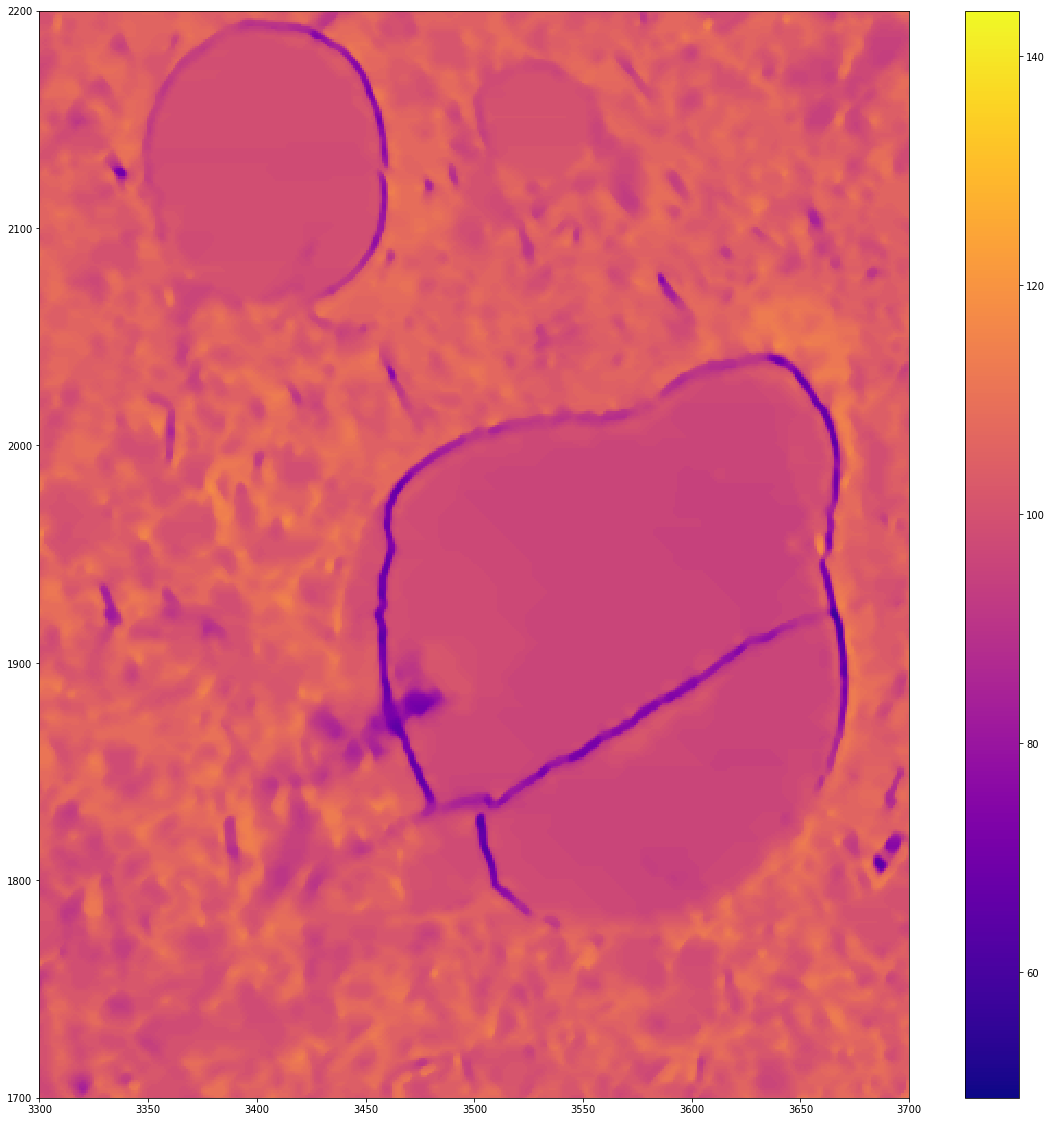

In [93]:
y = (1700, 2200)
x = (3300, 3700)
i = img.copy()

# i = cv2.GaussianBlur(img, (15,15), 0)
# footprint1 = np.array(
#     [[1, 1, 1]
#     ,[1, 0, 1]
#     ,[1, 1, 1]]
# )

# footprint2 = np.array(
#     [[1, 1, 1, 1, 1]
#     ,[1, 1, 1, 1, 1]
#     ,[1, 1, 0, 1, 1]
#     ,[1, 1, 1, 1, 1]
#     ,[1, 1, 1, 1, 1]]
# )

# creates a window based on the given footprint
# to compare neighbors and replace values on 
# nearest maximum value
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.maximum_filter.html
# i = ndimage.median_filter(i, footprint=footprint2, mode='constant')
# zeros = ndimage.maximum_filter(i, footprint=footprint2, mode='constant')

# i = filters.laplace(i, ksize=3)
# i = cv2.GaussianBlur(i, (15,15), 0)
i = crimmins(i)

fig, ax = helpers.plot_image(i, interpolation='none')
ax.set_xlim(x)
ax.set_ylim(y)

In [36]:
filename1 = 'benoitdata/F20-14A/HA-900_6um_jamtveit_att_pag-2.29_3.40_02043.tif'
filename2 = 'benoitdata/F20-14A/HA-900_6um_jamtveit_att_pag-2.29_3.40_04995.tif'

img1 = cv2.imread(filename1,0)
img2 = cv2.imread(filename2,0)

In [42]:
img = helpers.zscore(helpers.remove_data_based_on_radius(img))

(0.0, 1.0)

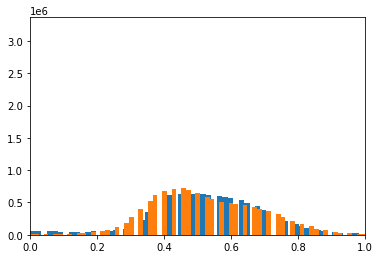

In [41]:
plt.hist(helpers.zscore(helpers.remove_data_based_on_radius(img1)).ravel(), bins=256)
plt.hist(helpers.zscore(helpers.remove_data_based_on_radius(img2)).ravel(), bins=256)
plt.xlim(0, 1)

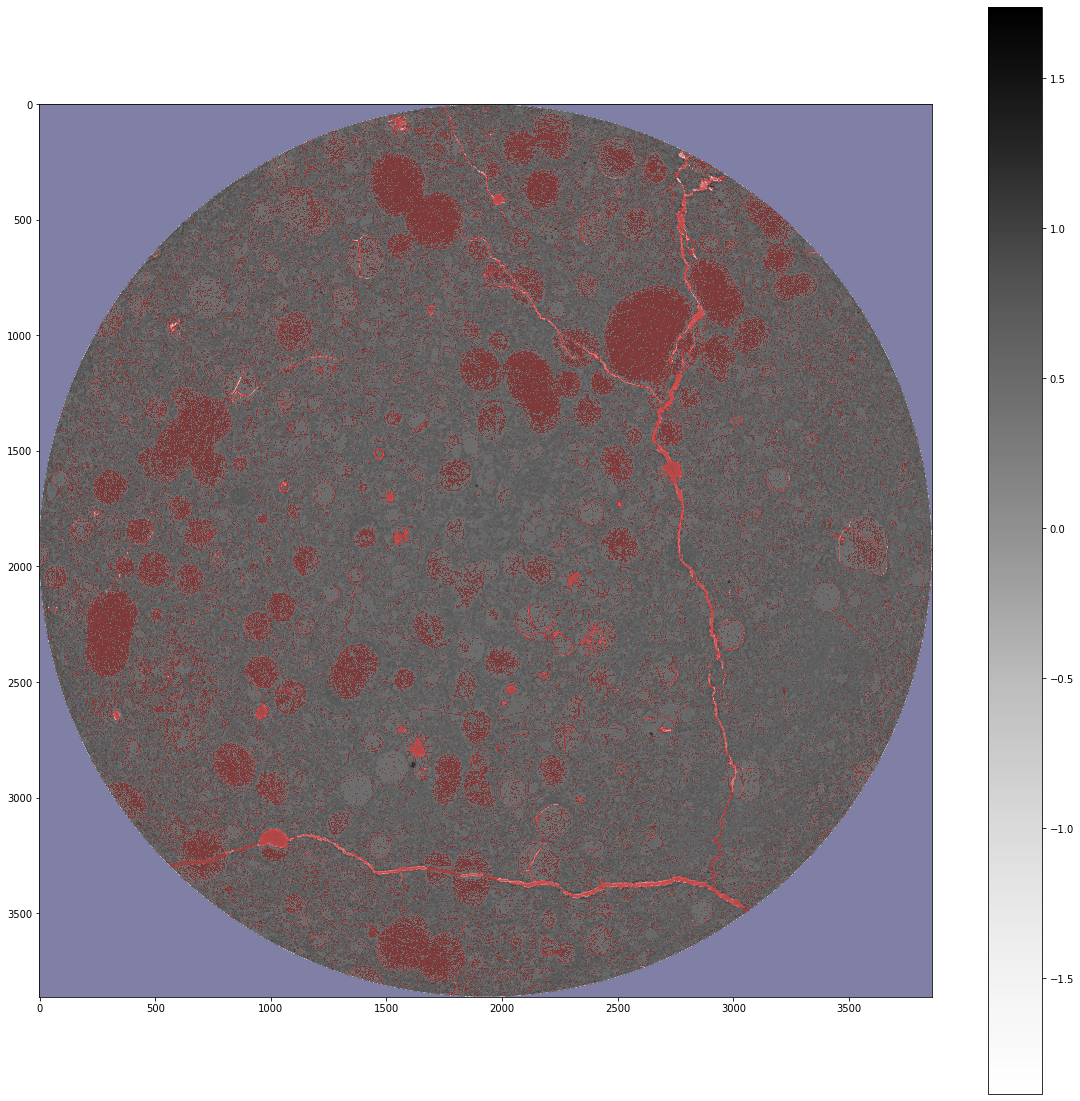

In [56]:
fig, ax = helpers.plot_image(img, cmap='Greys')

i = img.copy()
i[i > 0.4] = np.nan
# helpers.plot_image(img, interpolation='none', cmap='seismic', vmin=0.2, vmax=0.4)
ax.imshow(i, interpolation='none', cmap='seismic', alpha=0.5)
y = (1700, 2200)
x = (3300, 3700)

In [47]:
img*1e6

array([[-1886461.24044375, -1886461.24044375, -1886461.24044375, ...,
        -1886461.24044375, -1886461.24044375, -1886461.24044375],
       [-1886461.24044375, -1886461.24044375, -1886461.24044375, ...,
        -1886461.24044375, -1886461.24044375, -1886461.24044375],
       [-1886461.24044375, -1886461.24044375, -1886461.24044375, ...,
        -1886461.24044375, -1886461.24044375, -1886461.24044375],
       ...,
       [-1886461.24044375, -1886461.24044375, -1886461.24044375, ...,
        -1886461.24044375, -1886461.24044375, -1886461.24044375],
       [-1886461.24044375, -1886461.24044375, -1886461.24044375, ...,
        -1886461.24044375, -1886461.24044375, -1886461.24044375],
       [-1886461.24044375, -1886461.24044375, -1886461.24044375, ...,
        -1886461.24044375, -1886461.24044375, -1886461.24044375]])

array([ 1., nan, nan, ..., nan, nan, nan])

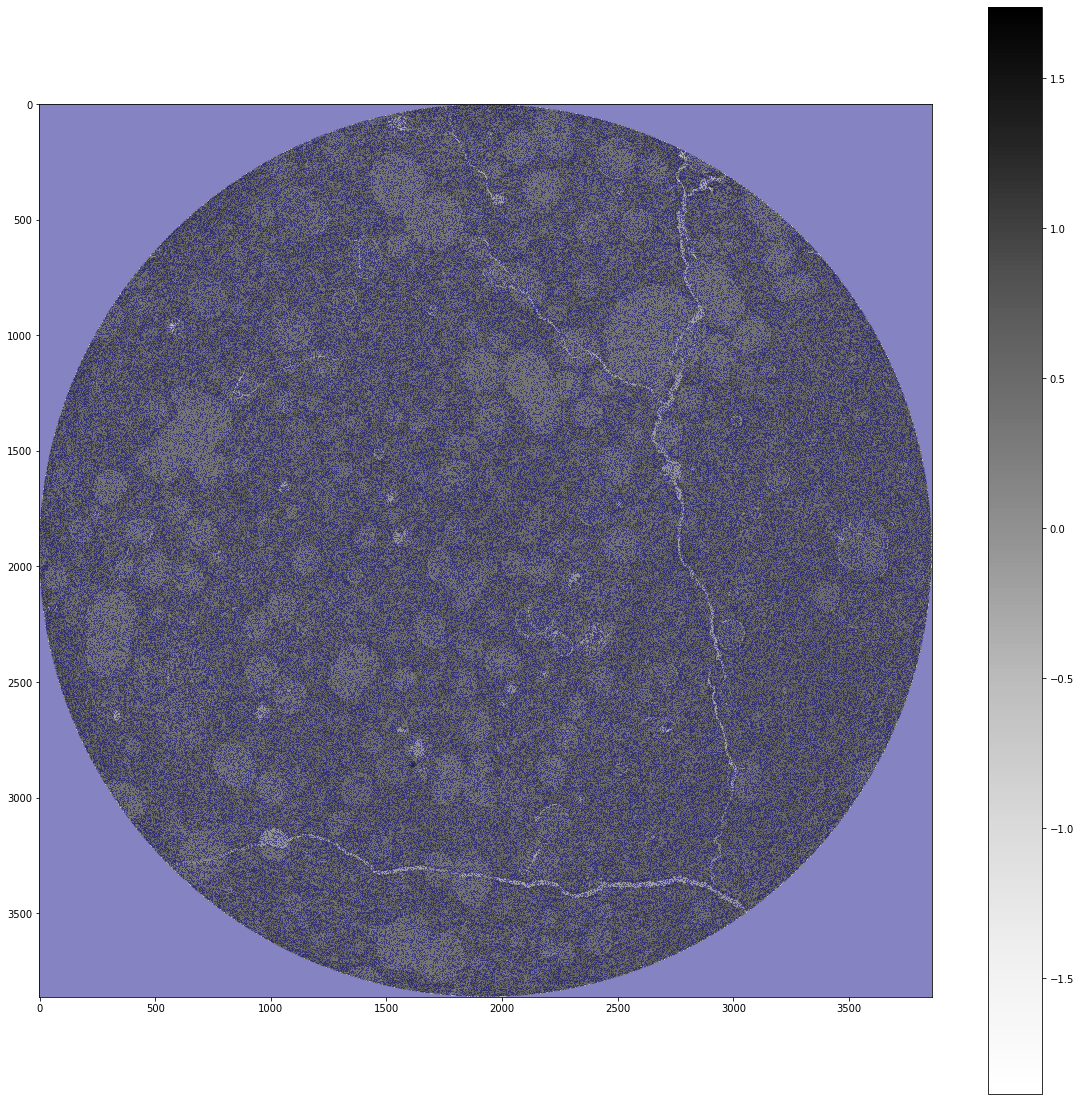

In [52]:
i = img.copy()
i = (i * 1e6).astype(np.uint8)

ret3, i = cv2.threshold(i, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
i = abs(i - 255)

fig, ax = helpers.plot_image(img, cmap='Greys')
iplot = i.copy()
iplot = iplot.astype(np.float64)
# iplot[iplot==0] = np.nan
iplot[iplot==0] = np.nan
ax.imshow(iplot, cmap='plasma', interpolation='none', alpha=0.5)
np.unique(iplot)

In [48]:
# Otsu's thresholding after Gaussian filtering
i = img.copy()
i = (i * 1e6).astype(np.uint8)

ret3, i = cv2.threshold(i, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
i = abs(i - 255)

i = cv2.morphologyEx(i, cv2.MORPH_CLOSE, np.ones((4, 4), np.uint8))
i = cv2.morphologyEx(i, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))

def convert_to_binary(img):
    ones_i = np.where(np.isnan(img), 0, 1).astype(np.uint8)
    return ones_i

# labeled = label(helpers.remove_data_based_on_radius(abs(i-255)))
labeled = label(i)
df = pd.DataFrame(regionprops_table(labeled, properties=['bbox', 'bbox_area', 'convex_area', 'eccentricity', 'extent', 'label', 'major_axis_length', 'minor_axis_length']))

# i = np.where(np.isin(labeled, df[(df.convex_area > 1000)].label.values), labeled, np.nan)
i = np.where(np.isin(labeled, df[(df.convex_area.between(5e3, 1e6)) & (df.extent.between(0.2, 0.8))].label.values), labeled, np.nan)
i = convert_to_binary(i)

array([nan, nan, nan, ..., nan, nan, nan])

/home/john/anaconda3/envs/faroe/lib/python3.7/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/john/anaconda3/envs/faroe/lib/python3.7/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


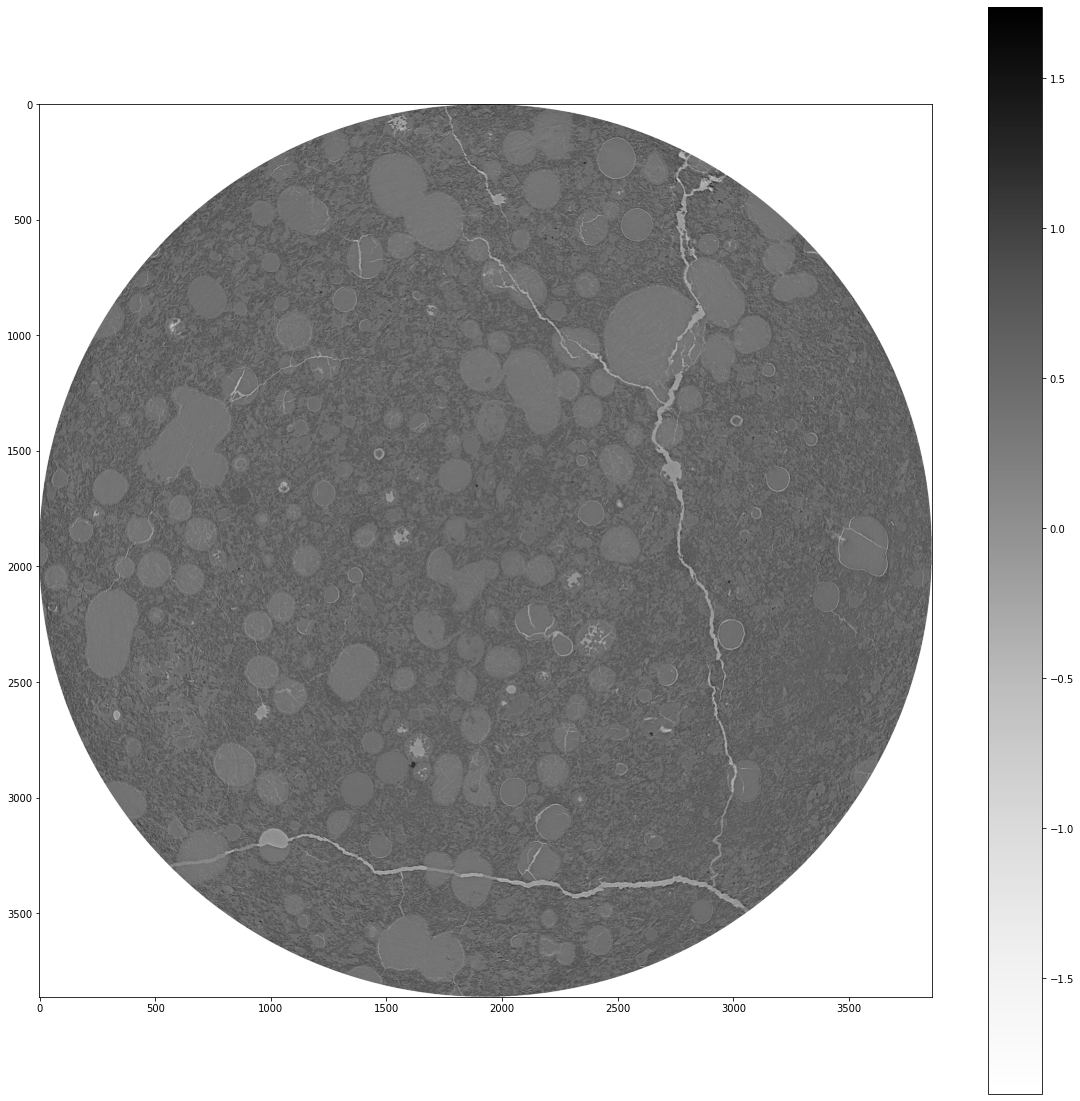

In [49]:
fig, ax = helpers.plot_image(img, cmap='Greys')
iplot = i.copy()
iplot = iplot.astype(np.float64)
# iplot[iplot==0] = np.nan
iplot[iplot==0] = np.nan
ax.imshow(iplot, cmap='plasma', interpolation='none', alpha=0.5)
np.unique(iplot)

In [51]:
df

bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  convex_area  eccentricity  \
0        0       0    3861    3861   14907321     14907321      0.076375   
1      407    2144     418    2153         99           92      0.699795   
2      417    1568     422    1573         25           25      0.000000   
3      847    2681     854    2688         49           49      0.000000   
4      886    2737     899    2751        182          167      0.590093   
..     ...     ...     ...     ...        ...          ...           ...   
82    2498    1369    2504    1374         30           30      0.560612   
83    2673    1505    2678    1512         35           35      0.707107   
84    3604    1603    3609    1608         25           25      0.000000   
85    3690    1550    3701    1558         88           85      0.739347   
86    3711    1575    3717    1584         54           52      0.785756   

      extent  label  major_axis_length  minor_axis_length  
0   0.969009      1        4499.950546        4486.806885  
1   0.878788      2          12.600682           9.001222  
2   1.000000      3           5.656854           5.656854  
3   1.000000      4           8.000000           8.000000  
4   0.846154      5          15.927995          12.859232  
..       ...    ...                ...                ...  
82  1.000000     83           6.831301           5.656854  
83  1.000000     84           8.000000           5.656854  
84  1.000000     85           5.656854           5.656854  
85  0.931818     86          12.721172           8.565484  
86  0.925926     87          10.301450           6.371823  

[87 rows x 11 columns]

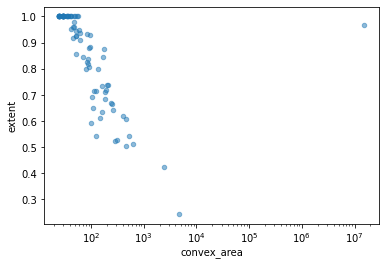

In [50]:
ax = df.plot.scatter(x='convex_area', y='extent', alpha=0.5)
ax.set_xscale('log')
convex_bound = (5e3, 1e6)
extend_bound = (0.2, 0.8)

In [13]:
# # labeled = label(helpers.remove_data_based_on_radius(abs(i-255)))
# labeled = label(i)
# df = regionprops_table(labeled, properties=['bbox', 'bbox_area', 'convex_area', 'eccentricity', 'extent', 'label', 'major_axis_length', 'minor_axis_length'])

In [14]:
# df = pd.DataFrame(df)

In [15]:
# fig, ax = plt.subplots()
# df.plot.scatter(x='convex_area', y='eccentricity', ax=ax, alpha=0.25)
# ax.set_xscale('log')

In [16]:
# df.eccentricity.hist(bins=100)

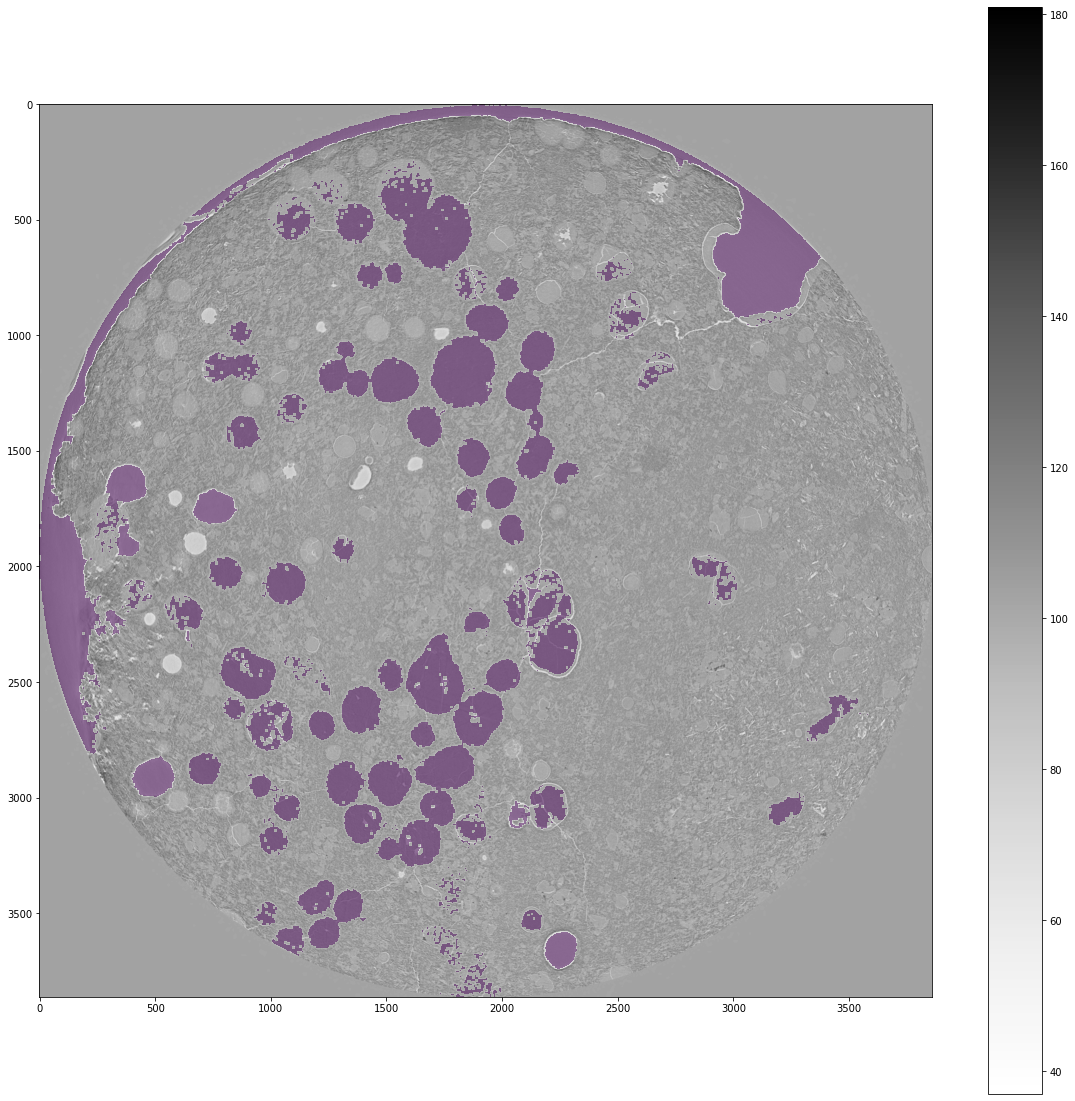

In [17]:
def convert_to_binary(img):
    ones_i = np.where(np.isnan(img), 0, 1).astype(np.uint8)
    return ones_i

imgconvex = np.where(np.isin(labeled, df[(df.convex_area > 10000)].label.values), labeled, np.nan)
imgconvex = convert_to_binary(imgconvex)



imgconvex = cv2.erode(imgconvex, np.ones((5, 5), np.uint8))
imgconvex = cv2.erode(imgconvex, np.ones((5, 5), np.uint8))
# imgconvex = cv2.dilate(imgconvex, np.ones((5, 5), np.uint8))
# imgconvex = cv2.dilate(imgconvex, np.ones((5, 5), np.uint8))
# imgconvex = cv2.dilate(imgconvex, np.ones((5, 5), np.uint8))
# imgconvex = cv2.dilate(imgconvex, np.ones((7, 7), np.uint8))
# imgconvex = cv2.dilate(imgconvex, np.ones((7, 7), np.uint8))

imgconvex = imgconvex.astype(np.float64)
imgconvex[imgconvex==0] = np.nan
# fig, ax = helpers.plot_image(imgconvex, interpolation='none')
fig, ax = helpers.plot_image(img, cmap='Greys')
ax.imshow(imgconvex, alpha=0.5, interpolation='none')

In [18]:
# zim = helpers.zscore(helpers.remove_data_based_on_radius(img))

# helpers.plot_image(zim, cmap='plasma', vmin=0.0, vmax=0.3, interpolation='none')

In [19]:
# plt.hist(zim.ravel(), bins=100)
# plt.xlim(-0.1, 1.1)

In [20]:
# cv2.threshold(img, 127, 255, 0)

In [21]:
# helpers.plot_image(img, vmin=90, vmax=100)

In [22]:
# zimg = helpers.zscore(img)
# ret, th1 = cv.threshold(img)

In [23]:
# helpers.plot_image(img)

In [24]:
# from mpl_toolkits import mplot3d


In [25]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# x = np.arange(0, img.shape[0], 1)
# y = np.arange(0, img.shape[1], 1)

# X, Y = np.meshgrid(x, y)
# ax.contour3D(X, Y, img, 50, cmap='binary')
